# Training SPS Benchmarking for A40 by Varying `num_envs`

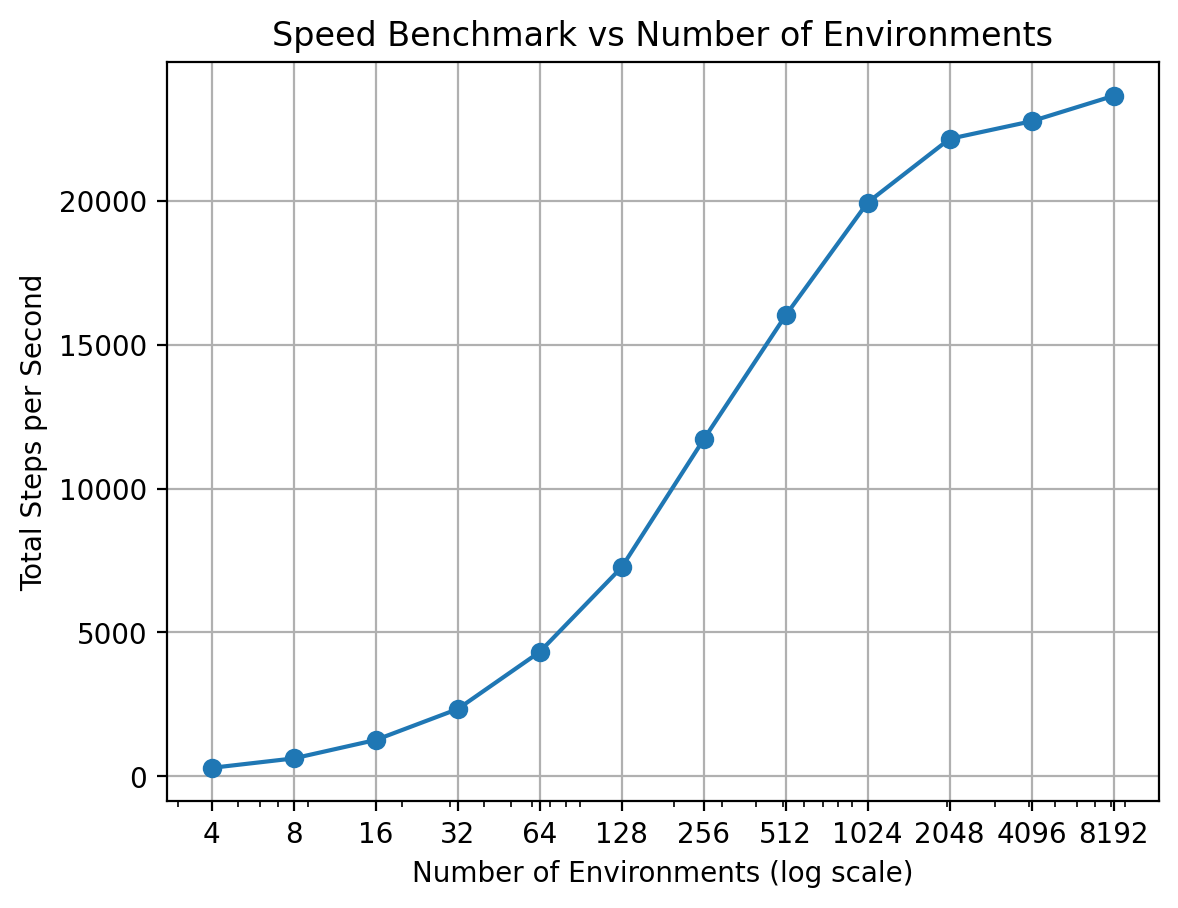

In [1]:
raw_data = """R-num_envs-8192_speed_benchmark_250416_021642	23655.38163070057
R-num_envs-4096_speed_benchmark_250416_002745	22772.8888734065
R-num_envs-2048_speed_benchmark_250416_002252	22159.346825535868
R-num_envs-1024_speed_benchmark_250416_002215	19946.326575277977
R-num_envs-512_speed_benchmark_250416_001532	16021.466799817947
R-num_envs-256_speed_benchmark_250416_001513	11707.495244888276
R-num_envs-128_speed_benchmark_250415_170047	7263.127044664432
R-num_envs-64_speed_benchmark_250415_170020	4318.144274440247
R-num_envs-32_speed_benchmark_250415_165903	2331.949569366373
R-num_envs-16_speed_benchmark_250415_165825	1255.9626530551352
R-num_envs-8_speed_benchmark_250415_165154	614.9347038153397
R-num_envs-4_speed_benchmark_250415_164943	286.7573628970842""".splitlines()

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import numpy as np
import re


def parse_data(raw_data):
    data = {}
    for line in raw_data:
        parts = line.split("\t")
        key = re.search(r"R-num_envs-(\d+)_speed_benchmark", parts[0]).group(
            1
        )  # Extract the number using regex
        value = float(parts[1])
        data[key] = value
    return data


def plot_data(data):
    keys = list(data.keys())
    values = list(data.values())

    # Convert keys to integers
    keys = [int(k) for k in keys]

    # Sort the data by keys
    sorted_indices = np.argsort(keys)
    keys = np.array(keys)[sorted_indices]
    values = np.array(values)[sorted_indices]

    plt.plot(keys, values, marker="o")
    plt.xscale("log")
    plt.xticks(keys, labels=keys)
    plt.xlabel("Number of Environments (log scale)")
    plt.ylabel("Total Steps per Second")
    plt.title("Speed Benchmark vs Number of Environments")
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    data = parse_data(raw_data)
    plot_data(data)

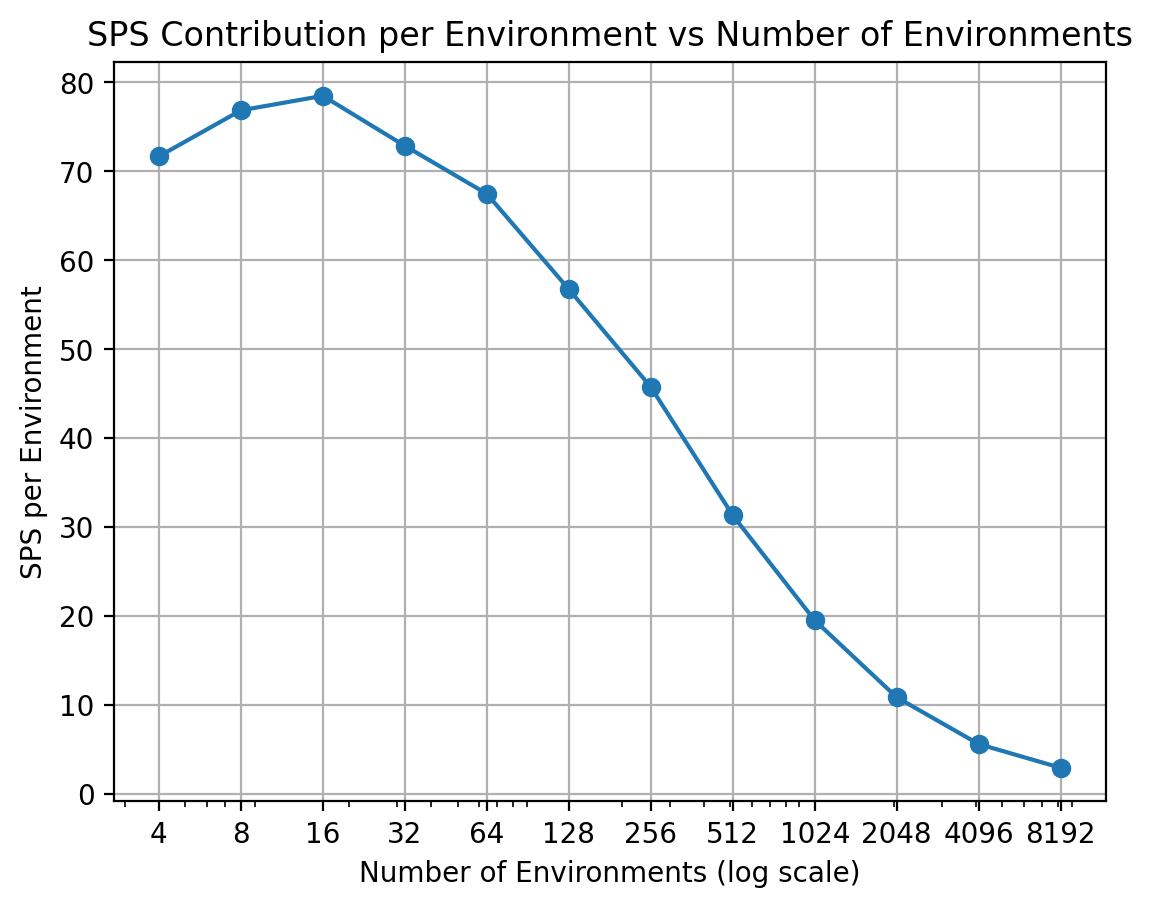

In [2]:
def plot_sps_per_env(data):
    keys = list(data.keys())
    values = list(data.values())

    # Convert keys to integers
    keys = [int(k) for k in keys]

    # Calculate SPS per environment
    sps_per_env = [v / k for v, k in zip(values, keys)]

    # Sort the data by keys
    sorted_indices = np.argsort(keys)
    keys = np.array(keys)[sorted_indices]
    sps_per_env = np.array(sps_per_env)[sorted_indices]

    plt.plot(keys, sps_per_env, marker="o")
    plt.xscale("log")
    plt.xticks(keys, labels=keys)
    plt.xlabel("Number of Environments (log scale)")
    plt.ylabel("SPS per Environment")
    plt.title("SPS Contribution per Environment vs Number of Environments")
    plt.grid(True)
    plt.show()


plot_sps_per_env(data)

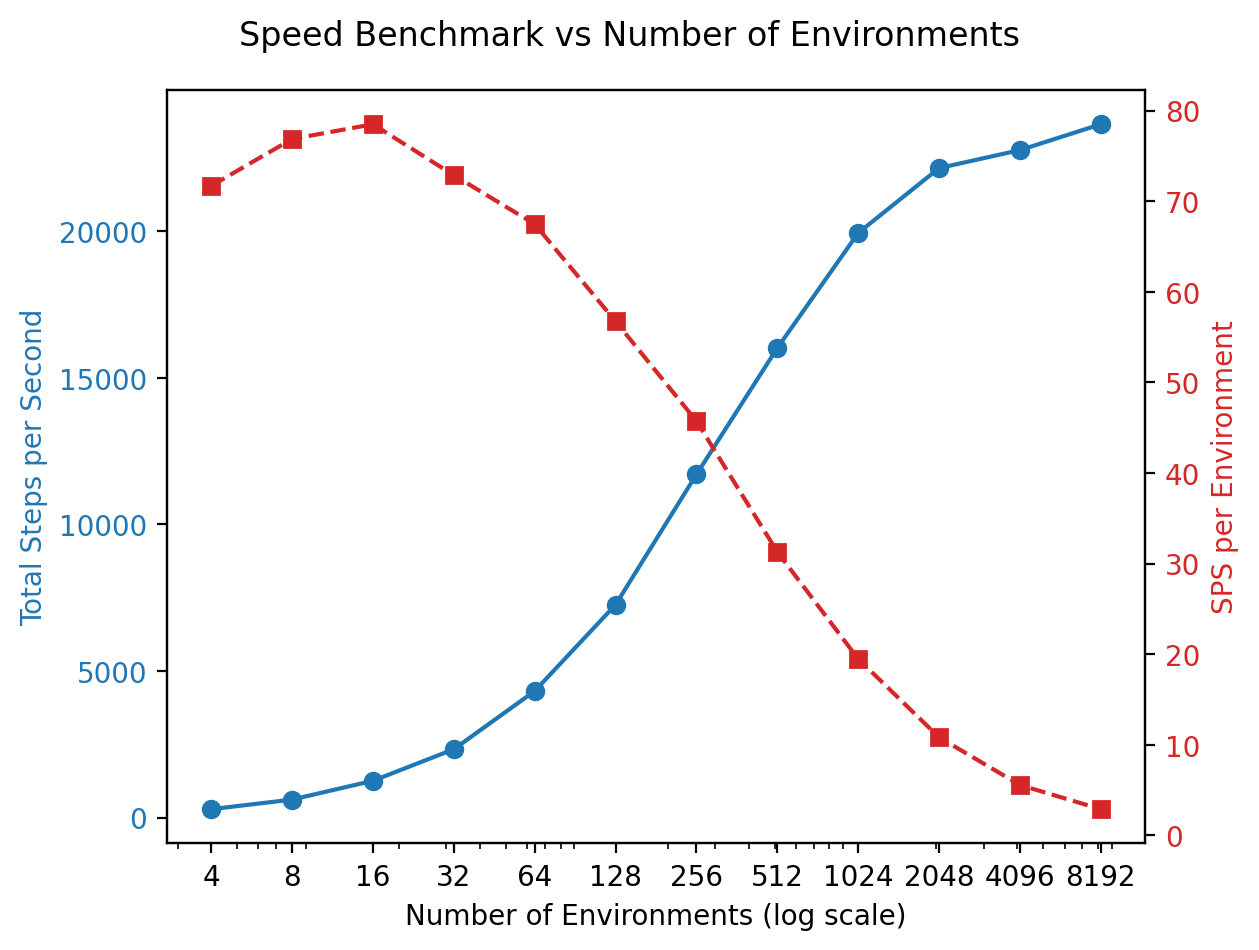

In [3]:
# Combine total SPS and SPS per environment on a shared x-axis with two y-axes
fig, ax1 = plt.subplots()

# Prepare sorted keys and values
keys = np.array(sorted(map(int, data.keys())))
values = np.array([data[str(k)] for k in keys])
sps_per_env = values / keys

# Plot total SPS on left y-axis
ax1.plot(keys, values, marker="o", color="tab:blue", label="Total SPS")
ax1.set_xscale("log")
ax1.set_xlabel("Number of Environments (log scale)")
ax1.set_ylabel("Total Steps per Second", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.set_xticks(keys)
ax1.set_xticklabels(keys)

# Plot SPS per environment on right y-axis
ax2 = ax1.twinx()
ax2.plot(
    keys, sps_per_env, marker="s", linestyle="--", color="tab:red", label="SPS per Env"
)
ax2.set_ylabel("SPS per Environment", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Add title and layout adjustments
fig.suptitle("Speed Benchmark vs Number of Environments")
fig.tight_layout()
plt.show()